In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import math

In [2]:
train_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\train.csv"
train_dataset = np.loadtxt(train_url, delimiter=',')
print(train_dataset.shape)
valid_url = r"C:\Code\Python\\ann\HPGe_Point_Efficiency\valid.csv"
valid_dataset = np.loadtxt(valid_url, delimiter=',')
print(valid_dataset.shape)
test_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\test.csv"
test_dataset = np.loadtxt(test_url, delimiter=',')
print(test_dataset.shape)
#print(test_dataset[0,0])
#print(test_dataset[0:,2])

(360, 3)
(144, 3)
(135, 3)


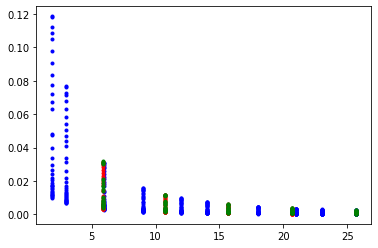

In [3]:
plt.plot(train_dataset[0:,0],train_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(valid_dataset[0:,0],valid_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')
plt.plot(test_dataset[0:,0],test_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='green', markeredgecolor='green')

In [4]:
x_train = train_dataset[:,0:2]
x_train[:,0] = x_train[:,0]/26
x_train[:,1] = x_train[:,1]/2500
y_train = -np.log10(train_dataset[:,2:3])/4
x_valid = valid_dataset[:,0:2]
x_valid[:,0] = x_valid[:,0]/26
x_valid[:,1] = x_valid[:,1]/2500
y_valid = -np.log10(valid_dataset[:,2:3])/4
x_test = test_dataset[:,0:2]
x_test[:,0] = x_test[:,0]/26
x_test[:,1] = x_test[:,1]/2500
y_test = -np.log10(test_dataset[:,2:3])/4
print(x_train.shape)
print(y_train.shape)

(360, 2)
(360, 1)


In [5]:
model = Sequential()
model.add(Dense(37, input_dim=2, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37)                111       
                                                                 
 dense_1 (Dense)             (None, 4)                 152       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 268
Trainable params: 268
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=1000, batch_size=20,validation_data=(x_valid, y_valid))
print('Model weights: ', model.get_weights())
model.save('HPGe_Point_Efficiency.h5')

Epoch 1/1000
18/18 [==============================] - 1s 13ms/step - loss: 1.0608e-06 - val_loss: 7.5621e-07
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.2916e-07 - val_loss: 6.7102e-07
Epoch 3/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.4707e-07 - val_loss: 7.4401e-07
Epoch 4/1000
18/18 [==============================] - 0s 9ms/step - loss: 8.4136e-07 - val_loss: 7.2896e-07
Epoch 5/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.4809e-07 - val_loss: 6.8767e-07
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.2122e-07 - val_loss: 6.8727e-07
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.5780e-07 - val_loss: 8.8691e-07
Epoch 8/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.5203e-07 - val_loss: 6.7264e-07
Epoch 9/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.2557e-07 - val_loss: 6.9851e-07
Epoch 10/1000
18/18 [======

18/18 [==============================] - 0s 5ms/step - loss: 8.4486e-07 - val_loss: 6.7400e-07
Epoch 77/1000
18/18 [==============================] - 0s 14ms/step - loss: 8.8635e-07 - val_loss: 6.7722e-07
Epoch 78/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.1661e-07 - val_loss: 6.6157e-07
Epoch 79/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.6693e-07 - val_loss: 6.7328e-07
Epoch 80/1000
18/18 [==============================] - 0s 8ms/step - loss: 8.6433e-07 - val_loss: 7.0215e-07
Epoch 81/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.4149e-07 - val_loss: 6.7637e-07
Epoch 82/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.5005e-07 - val_loss: 6.9426e-07
Epoch 83/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.7392e-07 - val_loss: 7.1393e-07
Epoch 84/1000
18/18 [==============================] - 0s 10ms/step - loss: 8.0985e-07 - val_loss: 7.5851e-07
Epoch 85/1000
18/18 [==========

Epoch 151/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.7623e-07 - val_loss: 6.8587e-07
Epoch 152/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.5371e-07 - val_loss: 9.5894e-07
Epoch 153/1000
18/18 [==============================] - 0s 10ms/step - loss: 8.2091e-07 - val_loss: 6.4684e-07
Epoch 154/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.7000e-07 - val_loss: 6.4548e-07
Epoch 155/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.7107e-07 - val_loss: 9.6726e-07
Epoch 156/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.8419e-07 - val_loss: 6.5127e-07
Epoch 157/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.2416e-07 - val_loss: 6.4516e-07
Epoch 158/1000
18/18 [==============================] - 0s 5ms/step - loss: 9.1520e-07 - val_loss: 7.2030e-07
Epoch 159/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.5017e-07 - val_loss: 6.6167e-07
Epoch 160

18/18 [==============================] - 0s 4ms/step - loss: 8.2204e-07 - val_loss: 7.0664e-07
Epoch 226/1000
18/18 [==============================] - 0s 5ms/step - loss: 9.1093e-07 - val_loss: 6.9538e-07
Epoch 227/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.0944e-07 - val_loss: 6.5651e-07
Epoch 228/1000
18/18 [==============================] - 0s 10ms/step - loss: 8.7627e-07 - val_loss: 6.4036e-07
Epoch 229/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.2314e-07 - val_loss: 6.5102e-07
Epoch 230/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.3182e-07 - val_loss: 6.5910e-07
Epoch 231/1000
18/18 [==============================] - 0s 8ms/step - loss: 8.0715e-07 - val_loss: 6.6525e-07
Epoch 232/1000
18/18 [==============================] - 0s 9ms/step - loss: 8.3587e-07 - val_loss: 6.9489e-07
Epoch 233/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.6264e-07 - val_loss: 7.0391e-07
Epoch 234/1000
18/18 [==

18/18 [==============================] - 0s 4ms/step - loss: 9.1382e-07 - val_loss: 6.6827e-07
Epoch 300/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.6670e-07 - val_loss: 7.7151e-07
Epoch 301/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.2776e-07 - val_loss: 6.2196e-07
Epoch 302/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.9417e-07 - val_loss: 6.5598e-07
Epoch 303/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.6789e-07 - val_loss: 6.3046e-07
Epoch 304/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.7032e-07 - val_loss: 6.5537e-07
Epoch 305/1000
18/18 [==============================] - 0s 4ms/step - loss: 9.8051e-07 - val_loss: 8.2935e-07
Epoch 306/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.0414e-07 - val_loss: 6.6827e-07
Epoch 307/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.5186e-07 - val_loss: 6.3769e-07
Epoch 308/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 7.8205e-07 - val_loss: 6.2449e-07
Epoch 374/1000
18/18 [==============================] - 0s 3ms/step - loss: 7.8578e-07 - val_loss: 6.7467e-07
Epoch 375/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.5501e-07 - val_loss: 6.3246e-07
Epoch 376/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.7260e-07 - val_loss: 6.6447e-07
Epoch 377/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.4447e-07 - val_loss: 6.2854e-07
Epoch 378/1000
18/18 [==============================] - 0s 3ms/step - loss: 8.7187e-07 - val_loss: 6.7859e-07
Epoch 379/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.9676e-07 - val_loss: 6.6963e-07
Epoch 380/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.9961e-07 - val_loss: 6.2117e-07
Epoch 381/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.5250e-07 - val_loss: 6.8765e-07
Epoch 382/1000
18/18 [===

18/18 [==============================] - 0s 6ms/step - loss: 8.4655e-07 - val_loss: 6.6625e-07
Epoch 448/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.4600e-07 - val_loss: 6.2675e-07
Epoch 449/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.9906e-07 - val_loss: 6.0078e-07
Epoch 450/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.0235e-07 - val_loss: 6.6729e-07
Epoch 451/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.5602e-07 - val_loss: 6.7342e-07
Epoch 452/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.5705e-07 - val_loss: 6.0947e-07
Epoch 453/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.7479e-07 - val_loss: 6.3164e-07
Epoch 454/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.7973e-07 - val_loss: 8.4643e-07
Epoch 455/1000
18/18 [==============================] - 0s 10ms/step - loss: 9.0148e-07 - val_loss: 6.3142e-07
Epoch 456/1000
18/18 [==

18/18 [==============================] - 0s 9ms/step - loss: 7.8553e-07 - val_loss: 6.1080e-07
Epoch 522/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.3097e-07 - val_loss: 6.2452e-07
Epoch 523/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.4041e-07 - val_loss: 7.3944e-07
Epoch 524/1000
18/18 [==============================] - 0s 9ms/step - loss: 8.1280e-07 - val_loss: 7.0144e-07
Epoch 525/1000
18/18 [==============================] - 0s 7ms/step - loss: 9.0340e-07 - val_loss: 6.8737e-07
Epoch 526/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.4563e-07 - val_loss: 8.7963e-07
Epoch 527/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.6683e-07 - val_loss: 6.1782e-07
Epoch 528/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.3769e-07 - val_loss: 6.0503e-07
Epoch 529/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.4300e-07 - val_loss: 6.3169e-07
Epoch 530/1000
18/18 [===

18/18 [==============================] - 0s 7ms/step - loss: 9.0386e-07 - val_loss: 6.2284e-07
Epoch 596/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.8412e-07 - val_loss: 6.7339e-07
Epoch 597/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.5178e-07 - val_loss: 6.3790e-07
Epoch 598/1000
18/18 [==============================] - 0s 9ms/step - loss: 9.0624e-07 - val_loss: 7.9997e-07
Epoch 599/1000
18/18 [==============================] - 0s 7ms/step - loss: 1.0266e-06 - val_loss: 7.2888e-07
Epoch 600/1000
18/18 [==============================] - 0s 5ms/step - loss: 1.0467e-06 - val_loss: 6.0891e-07
Epoch 601/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.9629e-07 - val_loss: 5.8777e-07
Epoch 602/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.7642e-07 - val_loss: 5.9745e-07
Epoch 603/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.7095e-07 - val_loss: 6.5342e-07
Epoch 604/1000
18/18 [===

18/18 [==============================] - 0s 7ms/step - loss: 8.0666e-07 - val_loss: 6.7780e-07
Epoch 670/1000
18/18 [==============================] - 0s 11ms/step - loss: 7.7268e-07 - val_loss: 6.0965e-07
Epoch 671/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.1075e-07 - val_loss: 6.1246e-07
Epoch 672/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.5375e-07 - val_loss: 5.8487e-07
Epoch 673/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.8873e-07 - val_loss: 6.1683e-07
Epoch 674/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.2957e-07 - val_loss: 5.9534e-07
Epoch 675/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.6775e-07 - val_loss: 7.1608e-07
Epoch 676/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.2155e-07 - val_loss: 6.5024e-07
Epoch 677/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.0268e-07 - val_loss: 6.3752e-07
Epoch 678/1000
18/18 [==

18/18 [==============================] - 0s 6ms/step - loss: 8.5044e-07 - val_loss: 8.5442e-07
Epoch 744/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.5366e-07 - val_loss: 7.4822e-07
Epoch 745/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.6472e-07 - val_loss: 6.3705e-07
Epoch 746/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.0039e-07 - val_loss: 6.7369e-07
Epoch 747/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.1201e-07 - val_loss: 5.9670e-07
Epoch 748/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.3655e-07 - val_loss: 6.0129e-07
Epoch 749/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.3321e-07 - val_loss: 5.9953e-07
Epoch 750/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.0222e-07 - val_loss: 6.1643e-07
Epoch 751/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.7798e-07 - val_loss: 6.7441e-07
Epoch 752/1000
18/18 [===

18/18 [==============================] - 0s 5ms/step - loss: 8.5356e-07 - val_loss: 5.9528e-07
Epoch 818/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.0175e-07 - val_loss: 6.5625e-07
Epoch 819/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.1490e-07 - val_loss: 6.1934e-07
Epoch 820/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.1571e-07 - val_loss: 5.6848e-07
Epoch 821/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.7488e-07 - val_loss: 5.9003e-07
Epoch 822/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.5912e-07 - val_loss: 5.6756e-07
Epoch 823/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.7927e-07 - val_loss: 5.8252e-07
Epoch 824/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.2642e-07 - val_loss: 6.5381e-07
Epoch 825/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.8496e-07 - val_loss: 5.8514e-07
Epoch 826/1000
18/18 [===

18/18 [==============================] - 0s 5ms/step - loss: 8.6042e-07 - val_loss: 6.3308e-07
Epoch 892/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.6757e-07 - val_loss: 5.8493e-07
Epoch 893/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.4091e-07 - val_loss: 5.8400e-07
Epoch 894/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.8224e-07 - val_loss: 6.1591e-07
Epoch 895/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.4498e-07 - val_loss: 5.9268e-07
Epoch 896/1000
18/18 [==============================] - 0s 7ms/step - loss: 7.6523e-07 - val_loss: 5.8551e-07
Epoch 897/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.4857e-07 - val_loss: 6.6645e-07
Epoch 898/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.6447e-07 - val_loss: 5.8346e-07
Epoch 899/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.4612e-07 - val_loss: 6.1184e-07
Epoch 900/1000
18/18 [===

18/18 [==============================] - 0s 6ms/step - loss: 7.2058e-07 - val_loss: 5.6034e-07
Epoch 966/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.3857e-07 - val_loss: 6.2228e-07
Epoch 967/1000
18/18 [==============================] - 0s 4ms/step - loss: 8.2052e-07 - val_loss: 7.6586e-07
Epoch 968/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.6680e-07 - val_loss: 5.8266e-07
Epoch 969/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.2719e-07 - val_loss: 6.3666e-07
Epoch 970/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2295e-07 - val_loss: 5.9004e-07
Epoch 971/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.1592e-07 - val_loss: 6.0480e-07
Epoch 972/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.2620e-07 - val_loss: 7.1016e-07
Epoch 973/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.8647e-07 - val_loss: 5.5893e-07
Epoch 974/1000
18/18 [===

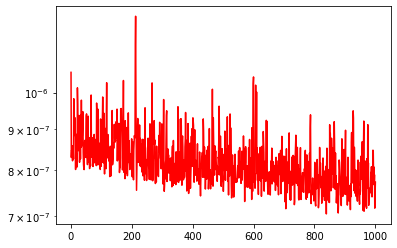

In [20]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.yscale("log")
plt.plot(epoch_count, training_loss, 'r-')

0.23005888755372014
99.99206164555645


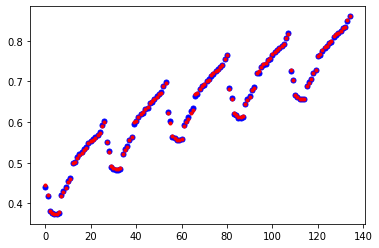

In [21]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_test)
error = np.abs((y_predict-y_test)/y_test)
recovery = np.abs(y_predict/y_test)
print(np.average(error)*100)
print(np.average(recovery)*100)
plt.plot(range(y_test.size),y_test,linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_test.size),y_predict,linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

0.012740220550504625
1.000316765621562
0.00012420869589803316
6.888771608987839e-05


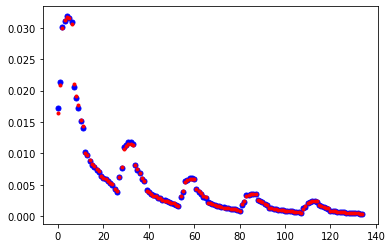

In [22]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_test)

relative_error = np.average(np.abs((np.power(10,-y_predict*4)-np.power(10,-y_test*4))/np.power(10,-y_test*4)))
recovery = np.average(np.abs(np.power(10,-y_predict*4)/np.power(10,-y_test*4)))
rmse = np.power(np.average(np.power(np.power(10,-y_predict*4)-np.power(10,-y_test*4),2)),0.5)
mae = np.average(np.abs(np.power(10,-y_predict*4)-np.power(10,-y_test*4)))

print(relative_error)
print(recovery)
print(rmse)
print(mae)

plt.plot(range(y_test.size),np.power(10,-y_test*4),linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_test.size),np.power(10,-y_predict*4),linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

In [10]:
print(np.power(10,-y_predict*4))

[[0.01357658]
 [0.01774245]
 [0.02977173]
 [0.03195294]
 [0.03312199]
 [0.03302617]
 [0.03150624]
 [0.01991102]
 [0.01815828]
 [0.01681353]
 [0.01469394]
 [0.01380701]
 [0.00996227]
 [0.00965314]
 [0.00879975]
 [0.00817653]
 [0.00787879]
 [0.00727588]
 [0.00701859]
 [0.00628387]
 [0.00601245]
 [0.00579625]
 [0.00557679]
 [0.00523473]
 [0.00505919]
 [0.00438934]
 [0.00402972]
 [0.00578341]
 [0.0072099 ]
 [0.010472  ]
 [0.01101807]
 [0.01135948]
 [0.01133769]
 [0.01098484]
 [0.00795642]
 [0.00740388]
 [0.00694964]
 [0.00617035]
 [0.00581943]
 [0.00415385]
 [0.00401412]
 [0.00362928]
 [0.00335125]
 [0.00321999]
 [0.00295841]
 [0.00284882]
 [0.0025438 ]
 [0.00243434]
 [0.00234841]
 [0.00226232]
 [0.00213024]
 [0.00206332]
 [0.00181128]
 [0.00167587]
 [0.00309435]
 [0.003949  ]
 [0.00563044]
 [0.00587006]
 [0.00599753]
 [0.00598769]
 [0.0058282 ]
 [0.00430504]
 [0.00399529]
 [0.00373591]
 [0.00328619]
 [0.00308385]
 [0.00215433]
 [0.00207997]
 [0.00187874]
 [0.00173667]
 [0.00167058]
 [0.00